<a href="https://colab.research.google.com/github/mostaf7583/IEEE-tasks/blob/main/IEEE_Session_2_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Welcome to the second session's task!</h1>

This task's objectives are to:



*   Apply end-to-end machine learning steps on a house prices dataset
*   Use a hands-on approach to learning scikit-learn and its uses in machine learning



<h1><b>End-to-end Machine Learning</b></h1>

Steps are to 



1.   Download the data
2.   Understand and Clean the Data
3.   Preprocess and Feature Engineer the Data
4.   Train a model using the data
5.   Measure the model's performance using cross validation
6.   Do hyperparameter tuning on the model and/or try different models
7.   Use the final selected model to make predictions on the test set



## Download the Data

This part really depends on the problem and how it's presented to you. 

For example, I have uploaded the data to Kaggle so you can download it from there. 

Google Colab also provides the option to upload files but those will be deleted once the Colab session ends so it's better to download the data using code so you can re-run that cell every time you want to download the data.

For this task, however, I have uploaded the data to Google Drive and it can be downloaded as so:

<h2>Extra information in case you're wondering what the next cell does:
</h2>


The exclamation mark allows us to use bash commands, which is a way to use the operating system from the command line.

Most common and useful commands are:

1. pwd 

(short for print working directory to print where we are executing the command)

2. ls 

(short for list directory to list directory contents)

3. cd 

(short for change directory to change our current directory)


4. mkdir 

(short for make directory to create a new directory)

5. mv 

(short for move to move a file or folder from one location to another)

6. cp 

(short for copy where it copies a file from one location to another)


So gdown is actually a program that comes pre-installed with colab and it allows us to download a file from Google Drive using its id.

In [20]:
!gdown 1lXJTBP4mOVnS2nMTusEcUHjqWgZGNkLW
!gdown 1U2IWwN78Td1XQz38_u60pXsU_WgQzCtB
!gdown 1RwXmgcY6rh-JPgGHWLRn5lzom8YMIIFC

'gdown' is not recognized as an internal or external command,
operable program or batch file.
'gdown' is not recognized as an internal or external command,
operable program or batch file.
'gdown' is not recognized as an internal or external command,
operable program or batch file.


<h2>Our goal for this task is to use the house_prices_train.csv dataset to create a model and use that model to predict prices for house_prices_test.csv

We will then submit the given price predictions to Kaggle in the same format as the file sample_submission.csv</h2>

In [21]:
import pandas as pd
#Helps make printing numbers look better
pd.options.display.float_format = '{:.2f}'.format

train = pd.read_csv('https://drive.google.com/uc?id=1lXJTBP4mOVnS2nMTusEcUHjqWgZGNkLW')

## Take a Quick Look at the Data Structure

<h1><b>Q1: Use some pandas built-in functions like head, describe, value_counts, etc. to take an initial look at the data</b></h1>

In [22]:
train.head()

,ad_id,type,area,bedrooms,bathrooms,level,furnished,rent,city,region,price
0,Ad id 194203902,apartment,155.00,2,3,ground,no,no,cairo,new cairo - el tagamoa,2569700.00
1,Ad id 192722330,apartment,160.00,2,1,2,no,yes,alexandria,kafr abdo,7000.00
2,Ad id 194289766,apartment,70.00,2,1,ground,no,no,cairo,nasr city,50000.00
3,Ad id 194361900,apartment,220.00,3,3,10+,no,no,dakahlia,mansura,2475000.00
4,Ad id 194365829,apartment,140.00,3,2,4,no,no,cairo,madinaty,3000000.00


# Discover and Visualize the Data to Gain Insights

<h1><b>Q2: Use any visualization library you like to visualize some of the datasets attributes. Hint: You can use pandas dataframes built-in hist and box plot methods or pandas scatter_matrix. Other solutions are also welcome.</b></h1>

array([[<AxesSubplot:xlabel='area', ylabel='area'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='area'>,
        <AxesSubplot:xlabel='price', ylabel='area'>],
       [<AxesSubplot:xlabel='area', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='bathrooms'>,
        <AxesSubplot:xlabel='price', ylabel='bathrooms'>],
       [<AxesSubplot:xlabel='area', ylabel='price'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='price'>,
        <AxesSubplot:xlabel='price', ylabel='price'>]], dtype=object)

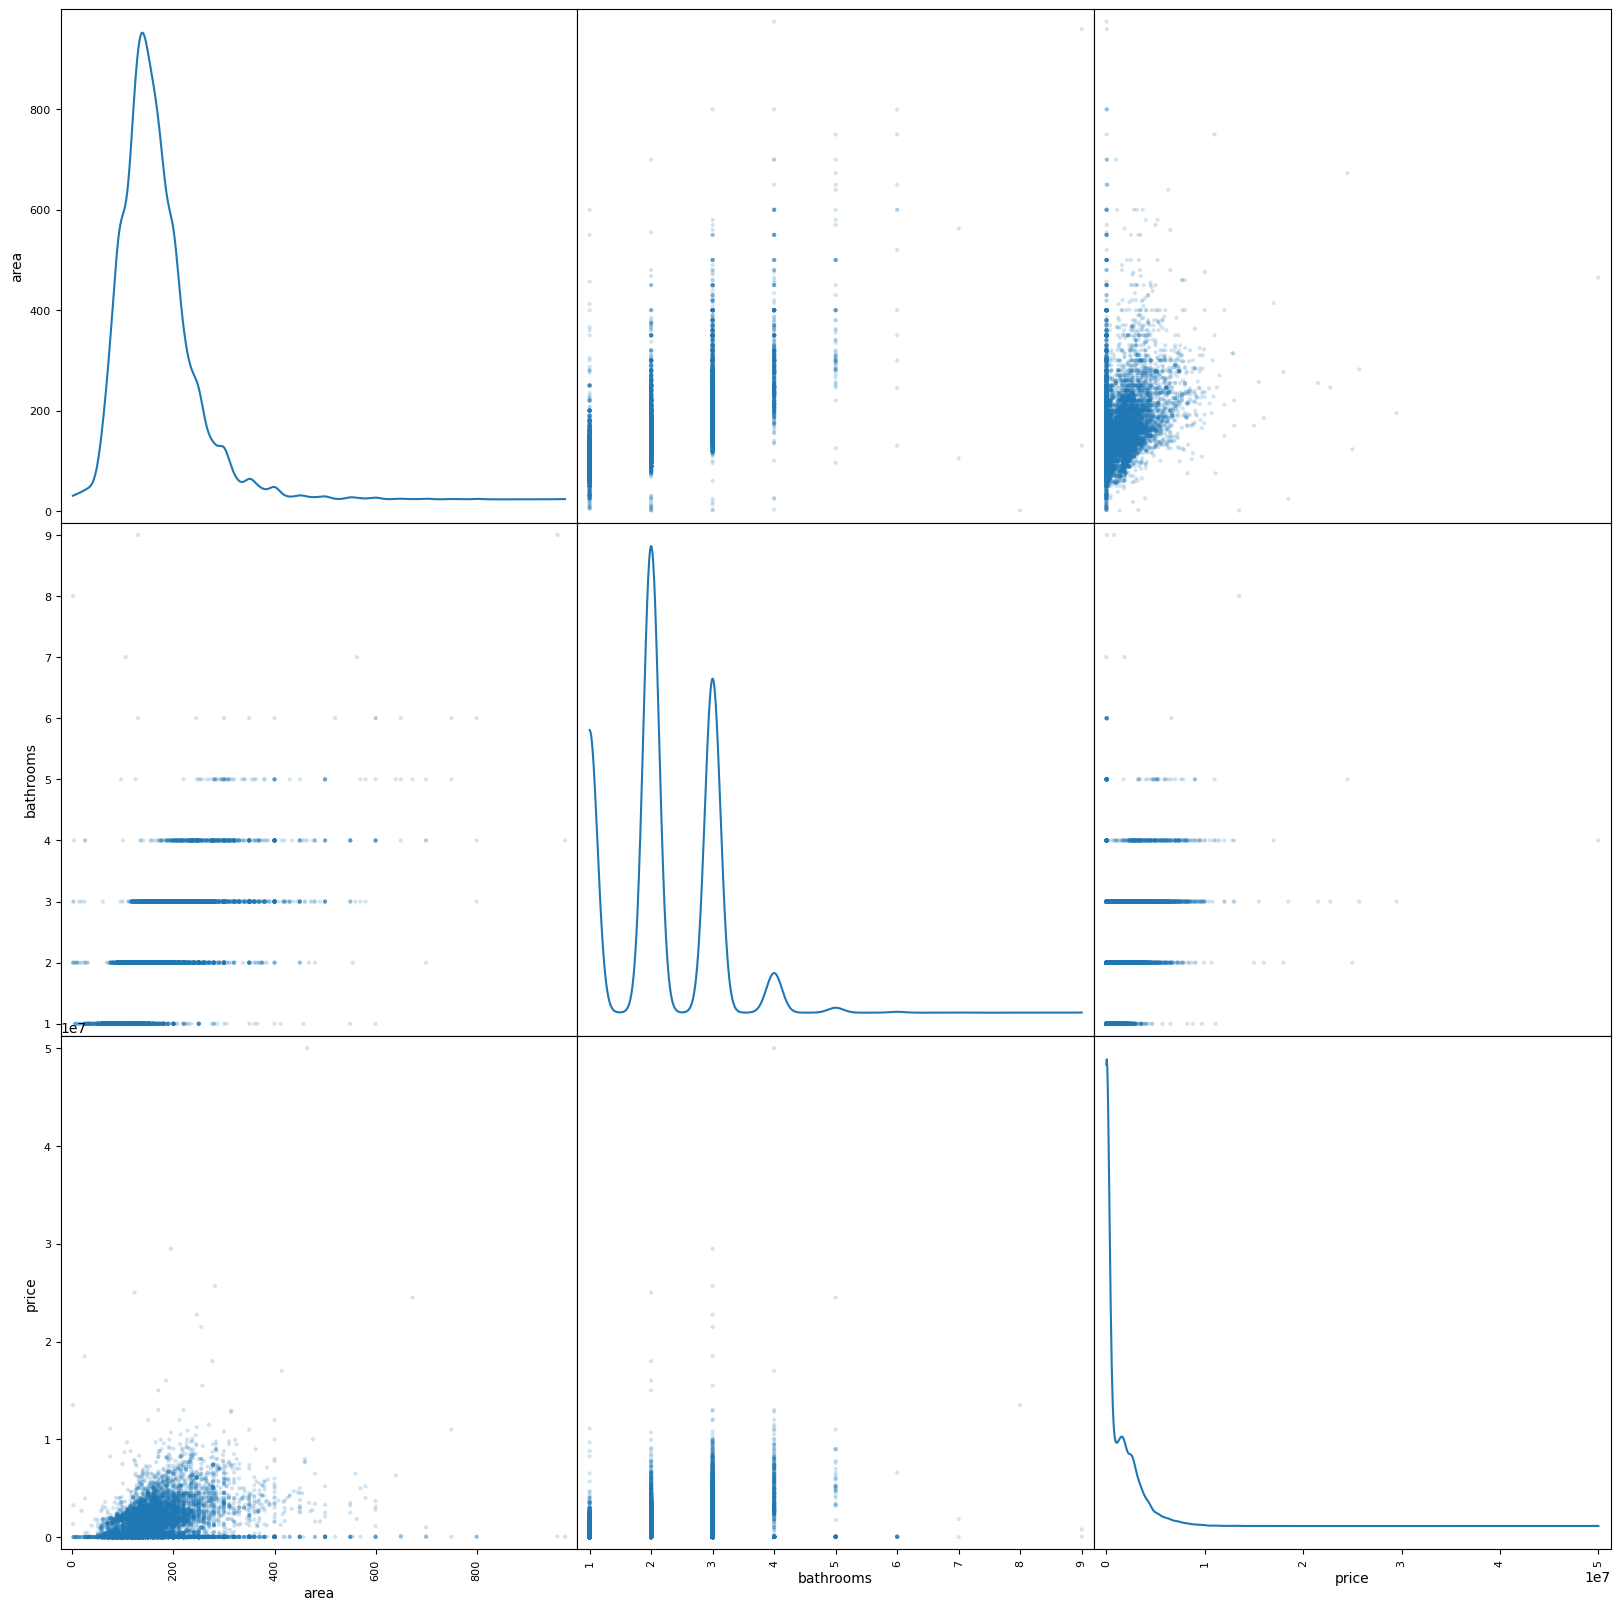

In [24]:

# visualize the some dataset attributes using a scatter matrix
from pandas.plotting import scatter_matrix
scatter_matrix(train, alpha=0.2, figsize=(20, 20), diagonal='kde')








## Looking for Correlations

<h1><b>Q3: Look for correlations using pandas df.corr function, this will give you an output correlation matrix. Select the price column from that correlation matrix and sort its values descendingly  using a built-in pandas function.</b></h1>

In [29]:
# Look for correlations using pandas df.corr function
correlation_matrix=train.corr()
# select the price column from the correlation matrix and sort it in descending order
correlation_matrix['price'].sort_values(ascending=False)



,area,bathrooms,price
area,1.00,0.68,0.27
bathrooms,0.68,1.00,0.36
price,0.27,0.36,1.00


# Prepare the Data for Machine Learning Algorithms

## Data Cleaning

<h1><b>Q4: Drop the ad_id column from the training set.</b></h1>

In [30]:
#  Drop the ad_id column
train.drop('ad_id', axis=1, inplace=True)

<h1><b>Q5: Check how many NaN values are there in the dataset. Demonstrate the three ways we've covered to deal with NaN values</b></h1>

In [35]:
# Check how many NaN values are there in the dataset.
train.isnull().sum()

# drop the rows with Nan values
train.dropna()



,type,area,bedrooms,bathrooms,level,furnished,rent,city,region,price
0,apartment,155.00,2,3,ground,no,no,cairo,new cairo - el tagamoa,2569700.00
1,apartment,160.00,2,1,2,no,yes,alexandria,kafr abdo,7000.00
2,apartment,70.00,2,1,ground,no,no,cairo,nasr city,50000.00
3,apartment,220.00,3,3,10+,no,no,dakahlia,mansura,2475000.00
4,apartment,140.00,3,2,4,no,no,cairo,madinaty,3000000.00
...,...,...,...,...,...,...,...,...,...,...
14156,apartment,240.00,3,3,ground,yes,yes,giza,sheikh zayed,12000.00
14158,duplex,295.00,4,3,5,no,no,cairo,new capital city,3705000.00
14159,apartment,130.00,3,2,2,no,no,cairo,new cairo - el tagamoa,925000.00
14160,apartment,155.00,3,2,5,no,no,cairo,nasr city,1450000.00


<h1><b>Q5.1: Demonstrate how to drop the furnished column entirely (don't alter the train dataframe)</b></h1>

In [ ]:
# drop furnished column
train.drop('furnished', axis=1, inplace=True)

<h1><b>Q5.2: Demonstrate how to drop the rows which have a furnished value of NaN (don't alter the train dataframe)</b></h1>

In [ ]:
train.drop(train[train['furnished'] == 'furnished'].index, inplace = True)

<h1><b>Q5.3: Demonstrate how to count the most frequent value in the furnished column and how to fill na values with this value using pandas fillna function (don't alter the train dataframe)</b></h1>

In [36]:
# count the most frequent value in the column
train['furnished'].value_counts()
# fill nan values with the most frequent value
train['furnished'].fillna('unfurnished', inplace=True)

no     8422
yes    2714
Name: furnished, dtype: int64

The next cell is to illustrate how you could solve Q5.3 using sklearn's SimpleImputer. You can use this as a reference for Q7.

In [37]:
from sklearn.impute import SimpleImputer

columns_to_impute = ['furnished']

imputer = SimpleImputer(strategy="most_frequent")

imputer.fit_transform(train[columns_to_impute])


array([['no'],
       ['no'],
       ['no'],
       ...,
       ['no'],
       ['no'],
       ['no']], dtype=object)

# Feature Engineering

<h1><b>Q6: You're free to experiment here with adding any features that could help improve the model's performance. Make sure to add them within the feature_engineer function</b></h1>

In [38]:

def feature_engineer(df):
  new_df = df.copy()
  new_df['area_to_bathroom_ratio'] = new_df.area / new_df.bathrooms
  return new_df

train = feature_engineer(train)

# Preprocessing

<h1><b>Q6: Demonstrate how to use sklearn's OneHotEncoder on the categorical columns. Use the cat_columns and num_columns lists to quickly specify categorical or numerical attributes.</b></h1>

In [47]:
#Don't forget to add any column names you created during feature engineering here
cat_columns = ['type', 'bedrooms', 'bathrooms', 'level', 'furnished', 'rent', 'city', 'region']

num_columns = ['area', 'area_to_bathroom_ratio']

In [41]:
from sklearn.preprocessing import OneHotEncoder


In [57]:
# use sklearn's OneHotEncoder on the categorical columns

cat_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
#Call the cat_encoder's fit_transform function on the train set's cat columns here
train_cat_one_hot = cat_encoder.fit_transform(train[cat_columns])


If the previous cell was correct, you should see the one hot encoded outputs as a DataFrame by runnning the next cell

In [58]:
cat_one_hot_df = pd.DataFrame(train_cat_one_hot, 
                              columns= cat_encoder.get_feature_names_out(), 
                              index = train.index);
cat_one_hot_df

,type_apartment,type_duplex,type_penthouse,type_room,type_studio,bedrooms_1,bedrooms_10,bedrooms_10+,bedrooms_2,bedrooms_3,...,region_waili,region_wardian,region_warraq,region_west somid,region_zagazig,region_zahraa al maadi,region_zamalek,region_zawya al-hamra,region_zezenia,region_zohour district
0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14157,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
14158,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
14159,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
14160,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


<h1><b>Q7: Demonstrate how to use sklearn's MinMaxScaler on the numerical columns. Use the cat_columns and num_columns lists to quickly specify categorical or numerical attributes. Use the same process as OneHotEncoder but for num_columns</b></h1>

In [59]:
from sklearn.preprocessing import MinMaxScaler


In [61]:
# use sklearn's MinMaxScaler on the numerical columns
num_scaler = MinMaxScaler()
# Use the cat_columns and num_columns lists to quickly specify categorical or numerical attributes
train_num_scaled = num_scaler.fit_transform(train[num_columns])
# Use the same process as OneHotEncoder but for num_columns
num_scaled_df = pd.DataFrame(train_num_scaled, columns=num_columns, index=train.index)
num_scaled_df

,area,area_to_bathroom_ratio
0,0.16,0.09
1,0.16,0.27
2,0.07,0.12
3,0.22,0.12
4,0.14,0.12
...,...,...
14157,0.13,0.11
14158,0.30,0.16
14159,0.13,0.11
14160,0.16,0.13


All previous preprocessing steps were for demonstration purposes. We'll actually be using sklearn's pipeline feature to construct our preprocessing pipeline like so:

## Transformation Pipelines

The next cell is an example for how to create a pipeline for categorical features only. It's a way to execute all the preprocessing steps using one call to cat_pipeline

In [62]:
from sklearn.pipeline import make_pipeline

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

cat_pipeline.fit_transform(train[cat_columns])

<14162x232 sparse matrix of type '<class 'numpy.float64'>'
	with 113296 stored elements in Compressed Sparse Row format>

In [63]:
cat_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='most_frequent')),
 ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))]

<h1><b>Q8: Define num_pipeline in the same way as cat_pipeline above but using SimpleImputer(strategy="median") and MinMaxScaler() instead</b></h1>

In [66]:
num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    MinMaxScaler(),
)

cat_pipeline.fit_transform(train[cat_columns])
cat_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='most_frequent')),
 ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))]

The next cell shows how to combine the two pipelines for numerical and categorical features to create our preprocessing pipeline for all features

In [67]:
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_columns),
    ("cat", cat_pipeline, cat_columns),
])

<h1><b>Q9: Define a variable X equal to all columns in the train dataset except price. Define another variable y that's just the price column</b></h1>

In [71]:
# Define a variable X equal to all columns in the train dataset except price.
X=train.loc[:, train.columns != 'price']

y = train['price']


# Select and Train a Model

## Training and Evaluating on the Training Set

The following cell demonstrates how to import a simple LinearRegression model and that you can add models at the end of existing pipelines to make a pipeline for preprocessing and training

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = make_pipeline(preprocessing, LinearRegression())
#This fits the model with the X as input and y as the target
lin_reg.fit(X, y) 
#This is making predictions on the training set which doesn't make sense
#It's only used here to demonstrate how to use the model to make predictions
predictions = lin_reg.predict(X) 
#Let's see the RMSE for the model on the training set
#Look at the documentation for mean_squared_error for more info
lin_rmse = mean_squared_error(y, predictions,
                              squared=False)
lin_rmse

1314528.7861495835

<h1><b>Q10: Import the RandomForestRegressor model and create a pipeline like the previous cell but with RandomForestRegressor instead of LinearRegressor. Don't forget to set the random_state parameter to any number to get reproducible results</b></h1>

In [76]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor())
forest_reg.fit(X, y)
forest_predictions = forest_reg.predict(X)
forest_rmse = mean_squared_error(y, forest_predictions, squared=False)
forest_rmse

    

654631.4555746771

## Better Evaluation Using Cross-Validation

<h1><b>Q11: Now import and use the cross_val_score function from sklearn. You need to pass in your model's pipeline, the X and y, and then specify the scoring metric to be "neg_root_mean_squared_error". </b></h1>

Note: This might take a few minutes to run!

Another Note: The cross_val_score function already splits the training data into training and validation data and reports the validation score.
There's no test data for you to split because I had already split it and won't make it available to you till later on :P

In [77]:
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(lin_reg, X, y, scoring="neg_root_mean_squared_error", cv=10)
forest_scores = cross_val_score(forest_reg, X, y, scoring="neg_root_mean_squared_error", cv=10)

# Fine-Tune Your Model

## Grid Search

The following demonstrates how to use grid search to do exhaustive search using the full pipeline (preprocessing + model).

It tries all combinations of the provided values and selects the model with the best score.

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'random_forest__n_estimators': [16, 32],
     'random_forest__max_features': [4, 6, 8]},
    {'random_forest__n_estimators': [64, 128],
     'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['area',
                                                                          'area_to_bathroom_ratio']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('simpleimputer',
                          

The best hyperparameter combination found:

In [81]:
grid_search.best_params_

{'random_forest__max_features': 10, 'random_forest__n_estimators': 128}

The model with the best score will be available as the best_estimator_ attribute of the grid_search object.

Since we are using pipelines, the final model is actually a pipeline which means it applies the preprocessing pipeline steps to its input and then the model prediction step

In [82]:
final_model = grid_search.best_estimator_

In [83]:
final_model




Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['area',
                                                   'area_to_bathroom_ratio']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(h

Let's look at the score of each hyperparameter combination tested during the grid search:

In [84]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_features,param_random_forest__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
11,10.33,0.11,0.15,0.00,10,128,"{'random_forest__max_features': 10, 'random_fo...",-1212647.55,-1226717.83,-1326744.44,-1255369.94,50795.23,1
9,10.19,0.15,0.14,0.00,8,128,"{'random_forest__max_features': 8, 'random_for...",-1215374.65,-1228336.38,-1332004.58,-1258571.87,52193.70,2
10,5.35,0.14,0.08,0.01,10,64,"{'random_forest__max_features': 10, 'random_fo...",-1214998.37,-1229155.51,-1331810.79,-1258654.89,52050.91,3
8,5.10,0.05,0.08,0.00,8,64,"{'random_forest__max_features': 8, 'random_for...",-1220191.90,-1231725.74,-1342308.39,-1264742.01,55049.46,4
7,11.02,0.64,0.18,0.02,6,128,"{'random_forest__max_features': 6, 'random_for...",-1220154.19,-1233600.80,-1342736.42,-1265497.13,54891.61,5


## Evaluate Your System on the Test Set

Now we'll load the test set, run our feature engineering function on it, and then pass it to our model's predict function (which does the preprocessing steps before predicting because it's a pipeline object)

In [94]:
test = pd.read_csv("https://drive.google.com/uc?id=1U2IWwN78Td1XQz38_u60pXsU_WgQzCtB")
test = feature_engineer(test)
test_predictions = final_model.predict(test)

We have a sample submission file demonstrating the format which we should submit our predictions. We'll just replace the price column with our predictions here and save the file

In [109]:
submission = pd.read_csv('https://drive.google.com/uc?id=1RwXmgcY6rh-JPgGHWLRn5lzom8YMIIFC')
submission.price = test_predictions

submission

,id,price
0,15462,1113053.03
1,11766,870970.05
2,9160,900465.73
3,53004,1891596.92
4,10998,383190.30
...,...,...
3678,32006,700037.72
3679,7234,653654.51
3680,15366,2098587.99
3681,31670,3480822.17


This is the file you should submit to kaggle. You can download it from the menu on the left of the colab website. 

In [110]:
sub=submission.to_csv('C:/Users/mosta/Desktop/project/gitCampas/IEEE-tasks/submission.csv', index=False)
import csv


<h1><b>You made it till the end. Awesome. 🔥🔥🔥</b></h1>

You're of course free to continue tinkering with the task after finishing it to try and get a better score (which will be reflected on the Kaggle leaderboard!)

You can try playing with different features in the feature engineering step, or importing and trying different models and/or hyperparameters, or maybe different preprocessing steps.

The possibilities are endless!
